In [1]:
from linares_plot import *

In [114]:
df = pd.read_csv('results1.csv')

In [115]:
df['mouse.x'] = df['mouse.x'].replace(df['mouse.x'].iloc[0], 0)
df['mouse.y'] = df['mouse.y'].replace(df['mouse.y'].iloc[0], 0)
df['mouse_2.x'] = df['mouse_2.x'].replace(df['mouse_2.x'].iloc[0], 0)
df['mouse_2.y'] = df['mouse_2.y'].replace(df['mouse_2.y'].iloc[0], 0)
df['x_resp'] = df['mouse.x'] + df['mouse_2.x']
df['y_resp'] = df['mouse.y'] + df['mouse_2.y']

In [116]:
df_ = df[['Color0', 'Color45', 'Color90', 'Color135', 'Color180', 'Color225',
       'Color270', 'Color315', 'Cueresp', 'target_angle', 'load', 'delay',
       'trial', 'x_resp', 'y_resp']].iloc[1:, :]

In [117]:
df_.head(10)

,Color0,Color45,Color90,Color135,Color180,Color225,Color270,Color315,Cueresp,target_angle,load,delay,trial,x_resp,y_resp
1,"[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[0, 0, 0]","[1, -1, 1]","[0, 0, 0]","[0, 0, 0]","[-1, -1, 1]","[-1, -1, 1]",315.0,3.0,2.0,0.0,0.337963,-0.225926
2,"[1, 1, -1]","[1, -1, -1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, -1]","[-1, 1, -1]",315.0,3.0,2.0,1.0,0.301852,-0.159259
3,"[0, 0, 0]","[0, 0, 0]","[1, 1, -1]","[1, 1, 1]","[0, 0, 0]","[0, 0, 0]","[1, -1, -1]","[0, 0, 0]","[1, 1, -1]",90.0,3.0,2.0,2.0,0.012037,0.369444
4,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1, -1, -1]","[-1, 1, -1]","[-1, -1, 1]","[0, 0, 0]","[-1, -1, 1]",270.0,3.0,2.0,3.0,-0.030556,-0.375000
5,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[-1, -1, 1]","[1, 1, -1]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]",135.0,3.0,2.0,4.0,-0.307407,0.317593
6,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1, 1, 1]","[0, 0, 0]","[1, -1, 1]","[-1, 1, 1]","[0, 0, 0]","[1, -1, 1]",225.0,3.0,2.0,5.0,-0.248148,-0.233333
7,"[0, 0, 0]","[-1, -1, 1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[1, 1, 1]","[0, 0, 0]","[-1, -1, 1]",45.0,3.0,2.0,6.0,0.272222,0.338889
8,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1, -1, 1]","[1, 1, -1]","[0, 0, 0]","[0, 0, 0]","[-1, 1, -1]","[1, 1, -1]",180.0,3.0,2.0,7.0,-0.424074,0.043519
9,"[1, 1, -1]","[1, -1, 1]","[-1, 1, -1]","[-1, -1, 1]","[-1, 1, 1]","[1, -1, -1]","[1, 1, 1]","[0, 0, 0]","[-1, 1, 1]",180.0,7.0,2.0,0.0,-0.016667,-0.354630
10,"[-1, -1, 1]","[1, -1, 1]","[-1, 1, -1]","[1, -1, -1]","[-1, 1, 1]","[1, 1, 1]","[0, 0, 0]","[1, 1, -1]","[-1, 1, 1]",180.0,7.0,2.0,1.0,0.160185,0.274074


In [118]:
##convert the coordinates to the actual response
pos0 = [0.4, 0]
pos45=[0.25,0.25]
pos90=[0,0.4]
pos135=[-0.25,0.25]
pos180=[-0.4,0]
pos225=[-0.25,-0.25]
pos270=[0,-0.4]
pos315=[0.25,-0.25]

coordinates_=[pos0, pos45, pos90, pos135, pos180, pos225, pos270, pos315]
coordinates_angles=[0.,45.,90.,135.,180.,225.,270.,315.]

def euclidean_distance(p1, p2):
    #p1=np.array([0,0.5])
    #p2=np.array([-0.1,0.4])
    return np.sqrt(np.sum(np.square(p1 - p2)))


responses=[]
modules=[]

for i in range(len(df_)):
    coordinates_resp = np.array([df_.iloc[i].x_resp, df_.iloc[i].y_resp])
    eucl_dists = [euclidean_distance(coordinates_resp, coordinates_[i]) for i in range(len(coordinates_))]
    responded_angle = coordinates_angles[np.where(eucl_dists==min(eucl_dists))[0][0]]
    responses.append(responded_angle)
    #####
    Ptraget = coordinates_[np.where(df_.iloc[i].target_angle==coordinates_angles)[0][0]]
    mod = euclidean_distance(coordinates_resp, Ptraget)
    modules.append(mod)

##

df_['responded'] = responses
df_['module'] = modules

In [119]:
df_.head(5)

,Color0,Color45,Color90,Color135,Color180,Color225,Color270,Color315,Cueresp,target_angle,load,delay,trial,x_resp,y_resp,responded,module
1,"[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[0, 0, 0]","[1, -1, 1]","[0, 0, 0]","[0, 0, 0]","[-1, -1, 1]","[-1, -1, 1]",315.0,3.0,2.0,0.0,0.337963,-0.225926,315.0,0.091198
2,"[1, 1, -1]","[1, -1, -1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, -1]","[-1, 1, -1]",315.0,3.0,2.0,1.0,0.301852,-0.159259,315.0,0.104511
3,"[0, 0, 0]","[0, 0, 0]","[1, 1, -1]","[1, 1, 1]","[0, 0, 0]","[0, 0, 0]","[1, -1, -1]","[0, 0, 0]","[1, 1, -1]",90.0,3.0,2.0,2.0,0.012037,0.369444,90.0,0.032841
4,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1, -1, -1]","[-1, 1, -1]","[-1, -1, 1]","[0, 0, 0]","[-1, -1, 1]",270.0,3.0,2.0,3.0,-0.030556,-0.375000,270.0,0.039480
5,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[-1, -1, 1]","[1, 1, -1]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]",135.0,3.0,2.0,4.0,-0.307407,0.317593,135.0,0.088681


In [120]:
##column for correct
df_['Correct'] = df_['target_angle'] == df_['responded']
df_['Correct'] = df_['Correct'] *1

df_.head(5)


,Color0,Color45,Color90,Color135,Color180,Color225,Color270,Color315,Cueresp,target_angle,load,delay,trial,x_resp,y_resp,responded,module,Correct
1,"[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[0, 0, 0]","[1, -1, 1]","[0, 0, 0]","[0, 0, 0]","[-1, -1, 1]","[-1, -1, 1]",315.0,3.0,2.0,0.0,0.337963,-0.225926,315.0,0.091198,1
2,"[1, 1, -1]","[1, -1, -1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, -1]","[-1, 1, -1]",315.0,3.0,2.0,1.0,0.301852,-0.159259,315.0,0.104511,1
3,"[0, 0, 0]","[0, 0, 0]","[1, 1, -1]","[1, 1, 1]","[0, 0, 0]","[0, 0, 0]","[1, -1, -1]","[0, 0, 0]","[1, 1, -1]",90.0,3.0,2.0,2.0,0.012037,0.369444,90.0,0.032841,1
4,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1, -1, -1]","[-1, 1, -1]","[-1, -1, 1]","[0, 0, 0]","[-1, -1, 1]",270.0,3.0,2.0,3.0,-0.030556,-0.375000,270.0,0.039480,1
5,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]","[-1, -1, 1]","[1, 1, -1]","[0, 0, 0]","[0, 0, 0]","[-1, 1, 1]",135.0,3.0,2.0,4.0,-0.307407,0.317593,135.0,0.088681,1


In [ ]:
##plots
df_['delay_label'] = df_['delay'].replace([2,9], ['delay 2', 'delay 9'] )

Text(0.5,0,'nº items (load)')

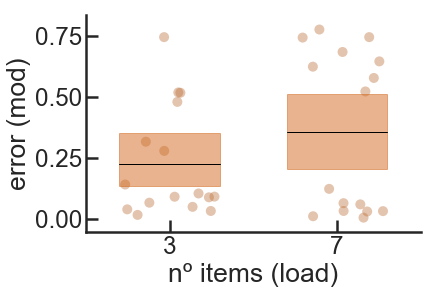

In [127]:
linares_plot(x='load', y='module', df=df_, order=[3,7], 
              palette=['chocolate'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')

Text(0.5,0,'delay (s)')

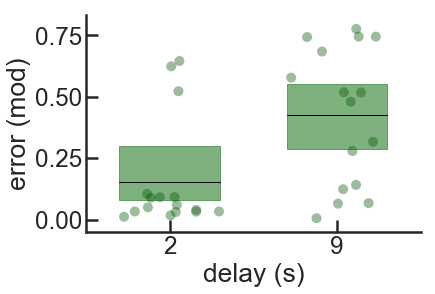

In [129]:
linares_plot(x='delay', y='module', df=df_, order=[2,9], 
              palette=['darkgreen'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('delay (s)')

Text(0.5,0,'nº items (load)')

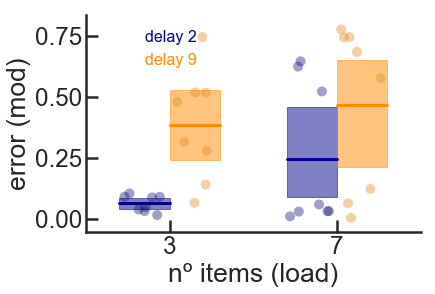

In [126]:

linares_plot(x='load', y='module', hue='delay_label', df=df_, order=[3,7], 
             hue_order=['delay 2', 'delay 9'], palette=['darkblue', 'darkorange'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')